In [95]:
#importing the important modules
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#making the matplot work inline
%matplotlib inline

#importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

#importing all the matrix evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score



## OUR PROBLEM STATEMENT
* Context
A fictional dataset for exploratory data analysis (EDA) and to test simple prediction models.

This toy dataset features 150000 rows and 6 columns.

Columns
Note: All data is fictional. The data has been generated so that their distributions are convenient for statistical analysis.

Number: A simple index number for each row

City: The location of a person (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin)

Gender: Gender of a person (Male or Female)

Age: The age of a person (Ranging from 25 to 65 years)

Income: Annual income of a person (Ranging from -674 to 177175)

Illness: Is the person Ill? (Yes or No)

In [30]:
toy = pd.read_csv("toy_dataset.csv")

In [31]:
toy = toy.drop("Number", axis=1)

In [88]:
toy.head()
toy["Illness"].value_counts()

No     137861
Yes     12139
Name: Illness, dtype: int64

In [33]:
toy.isna().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [55]:
X = toy.drop("Illness", axis = 1)
Y = toy["Illness"] 


RangeIndex(start=0, stop=150000, step=1)

In [75]:
Y = Y.replace("Yes", 1)
Y = Y.replace("No", 0)
Y.dtype

dtype('int64')

In [101]:
#have to tranform few columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cate_features = ["City", "Gender"]
cate_fea_of_y = ["Illness"]

One_hot = OneHotEncoder()

column_transform = ColumnTransformer([("One_hot", 
                                        One_hot,
                                        cate_features)],
                                        remainder="passthrough")
Transformed_X = column_transform.fit_transform(X)

newdata = pd.DataFrame(Transformed_X)
newdata = newdata.join(Y)

In [78]:
#split the data

x_train, x_test, y_train, y_test = train_test_split(Transformed_X, Y, test_size=0.2)


In [82]:
# Now we use models and fit them into this

clf = LogisticRegressionCV(cv = 5)

clf.fit(x_train, y_train)

LogisticRegressionCV(cv=5)

In [85]:
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

In [86]:
confusion_matrix(y_test, y_pred)

array([[27657,     0],
       [ 2343,     0]], dtype=int64)

In [87]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,27657,0
1,2343,0


In [89]:
clf.score(x_test, y_test)

0.9219

In [90]:
clf2 = RandomForestClassifier()

clf2.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
clf2.score(x_test, y_test)

0.8686666666666667

In [92]:
y_preds = clf2.predict(x_test)


In [93]:
pd.DataFrame(confusion_matrix(y_test, y_preds))

,0,1
0,25906,1751
1,2189,154


In [97]:
datanew = Transformed_X.join(Y)

AttributeError: 'numpy.ndarray' object has no attribute 'join'

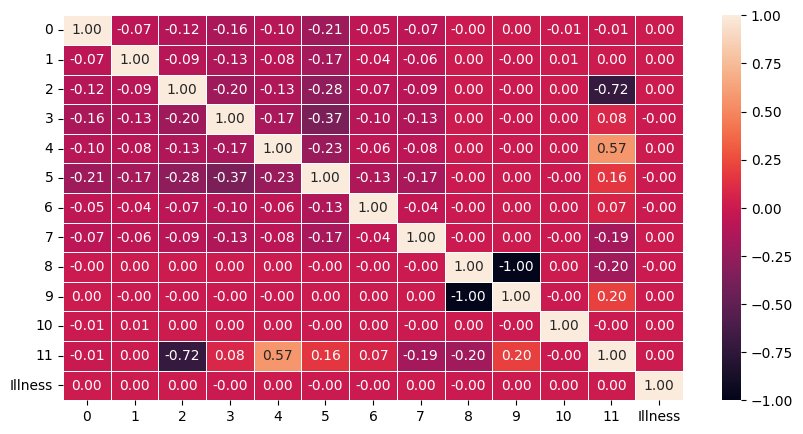

In [105]:
correlation_mat = newdata.corr()
fig, ax = plt.subplots(figsize = (10,5))
heatmapp = sns.heatmap(correlation_mat, annot=True, linewidths=0.5, fmt=".2f")